# <img src="./fiuba.jpg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico 1
#### Esp. Ing. Martín Nicolás Menéndez

***
## Recepción de comunicaciones antipodales con ruido


<div class="alert alert-block alert-info">
    Un receptor de comunicaciones posee un frontend analógico que recibe señales moduladas en PAM (Pulse Amplitude Modulation), por medio de pulsos de forma exponencial. El canal por el cual viajan estos pulsos es un canal AWGN (Additive White Gaussian Noise), por lo cual la señal recibida se verá degradada notablemente. En principio, se puede suponer que afecta de forma independiente a cada muestra de la señal.

Se dispone una trama digitalizada muestrada a 20 samples / pulso. La trama contiene un header de 16 bytes donde cada byte es: 10101100.

La modulación empleada es antipodal:

    pulso positivo  -> bit 1
    pulso negativo -> bit 0

Objetivos principales:

    Detectar la secuencia de bits recibida de forma confiable
    Investigar diferentes métodos de demodulación
   
  </div>


<div class="alert alert-block alert-success">
<b>Notas:</b> La señal se encuentra sincronizada a nivel muestra. Por esta razón, la muestra 0 corresponde al comienzo de un pulso exponencial.

Tener en cuenta que el objetivo es recuperar la información, lo cual no implica recuperar fielmente la señal enviada. Esto es clásico en problemas de comunicaciones: sabemos la forma de la modulación (la forma de los pulsos y como se modulan), lo que no sabemos es con qué valores fueron modulados.<a>
</div>





<div class="alert alert-block alert-info">
<b>1) a) 1)</b>  Filtrar la señal con un filtro digital para eliminar potencia de ruido. Pueden probar con filtros FIR o IIR, los que les parezcan convenientes.


</div>

In [4]:
# Importacion de bibliotecas
import numpy as np
import statistics 
from numpy import arange
import matplotlib.pyplot as plt
import scipy.signal as dspTools
from math import trunc

In [162]:
# Carga de datos
señal_poco_ruido = np.load('signalLowSNR.npy')
señal_mucho_ruido = np.load('signal.npy')
pulso = np.load('pulse.npy')

header = [1,0,1,0,1,1,0,0]*16

In [118]:
# Calculo de N                           
N_s = len(signal)
N_p = len(pulse)

t = arange(N_s)

t_t = arange(N_s//20)

Grafico la señal generadora

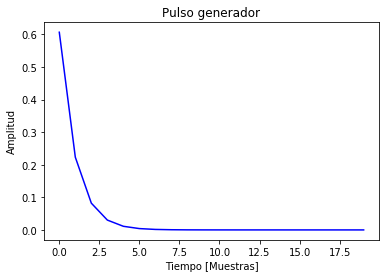

In [7]:
plt.figure()

plt.plot(pulse,'b')

plt.title('Pulso generador')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.show()

Cada bit en 1 añade el pulso anterior de forma positiva. Cada bit en 0 añade el pulso anterior invertido, generando la señal recibida luego de añadirle ruido.

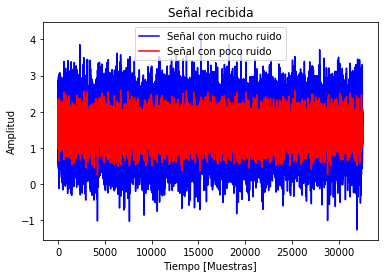

In [119]:
plt.figure()

plt.plot(señal_mucho_ruido,'b')
plt.plot(señal_poco_ruido,'r')

plt.title('Señal recibida')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.legend(('Señal con mucho ruido', 'Señal con poco ruido'))
plt.show()

Creación del filtro FIR

In [120]:
nTaps = 512
f = 0.2

b_fir = dspTools.firwin(nTaps, f, window='boxcar')

filtrado_mucho_ruido = dspTools.lfilter(b_fir, 1.0, señal_mucho_ruido)
filtrado_poco_ruido = dspTools.lfilter(b_fir, 1.0, señal_poco_ruido)

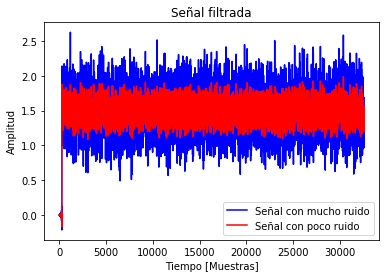

In [121]:
plt.figure()

plt.plot(filtrado_mucho_ruido,'b')
plt.plot(filtrado_poco_ruido,'r')

plt.title('Señal filtrada')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.legend(('Señal con mucho ruido', 'Señal con poco ruido'))
plt.show()

<div class="alert alert-block alert-info">
<b>1) a) 2)</b> ¿Es óptimo el filtro elegido para detectar la información en forma confiable?

</div>

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lamentablemente el filtro NO es el óptimo. El que si lo sería es el filtro óptimo o <b>filtro adaptado</b>
</div>


<div class="alert alert-block alert-info">
<b>1)</b> b) Definir un umbral que permita tomar decisiones ("vino un 1" o "vino un 0") para cada pulso y reconstruir la trama enviada. Nuevamente, ¿es óptimo este umbral?

</div>

In [137]:
media_mucho_ruido = statistics.mean(filtrado_mucho_ruido)
media_poco_ruido = statistics.mean(filtrado_poco_ruido)

Submuestreo las señales

In [138]:
señal_mucho_ruido_sub = filtrado_mucho_ruido[20::20] - media_mucho_ruido
señal_poco_ruido_sub = filtrado_poco_ruido[20::20] - media_poco_ruido

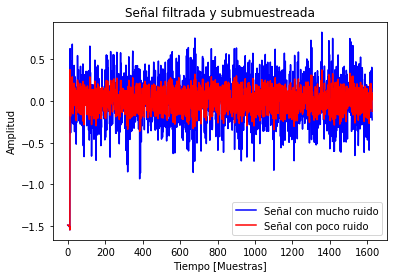

In [141]:
plt.figure()

plt.plot(señal_mucho_ruido_sub,'b')
plt.plot(señal_poco_ruido_sub,'r')

plt.title('Señal filtrada y submuestreada')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.legend(('Señal con mucho ruido', 'Señal con poco ruido'))
plt.show()

In [250]:
N_sub = len(señal_mucho_ruido_sub)

bits_mucho_ruido = np.zeros(N_sub)
bits_poco_ruido = np.zeros(N_sub)

for i in range(N_sub):
    if señal_mucho_ruido_sub[i] > 0:
        bits_mucho_ruido[i] = 1   
        
    if señal_poco_ruido_sub[i] > 0:
        bits_poco_ruido[i] = 1      

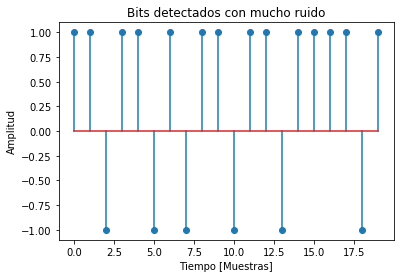

In [251]:
plt.figure()
plt.stem(2*bits_mucho_ruido[12:128//4]-1)

plt.title('Bits detectados con mucho ruido')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.show()

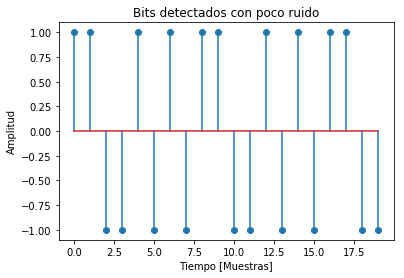

In [253]:
plt.figure()
plt.stem(2*bits_poco_ruido[12:128//4]-1)

plt.title('Bits detectados con poco ruido')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.show()

In [254]:
print (*bits_mucho_ruido[12:128//4],sep="|")

1.0|1.0|0.0|1.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|1.0|1.0|0.0|1.0|1.0|1.0|1.0|0.0|1.0


In [255]:
print (*bits_poco_ruido[12:128//4],sep="|")

1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0


Analizamos cuantos bits de los 16 bytes del header coinciden con la secuencia dato (10101100)

In [256]:
aux_mucho_ruido = 0
aux_poco_ruido = 0
dim = 16*8
for i in range(dim):
    if(header[i] == bits_mucho_ruido[12+i]):
        aux_mucho_ruido += 1
    if(header[i] == bits_poco_ruido[12+i]):
        aux_poco_ruido += 1           
        
print("Coincidencia de bits (mucho ruido):",100*aux_mucho_ruido/dim,"%")      
print("Coincidencia de bits (poco ruido):",100*aux_poco_ruido/dim,"%")  

Coincidencia de bits (mucho ruido): 45.3125 %
Coincidencia de bits (poco ruido): 50.78125 %


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El umbral seleccionado fue la media. Pero no se tienen certezas de que el mismo sea el umbral óptimo.
</div>

<div class="alert alert-block alert-info">
<b>2) a)</b> Repetir el procedimiento para la parte 1, pero utilizar el filtro y el umbral óptimo.
</div>

Invertimos la señal del pulso para generar el filtro

In [189]:
pulso_reflejado = pulse[::-1]

El filtro adaptado será la convolución entre la señal y el pulso invertido

In [190]:
señal_mucho_ruido_conv = np.convolve(pulso_reflejado, señal_mucho_ruido)
señal_poco_ruido_conv = np.convolve(pulso_reflejado, señal_poco_ruido)

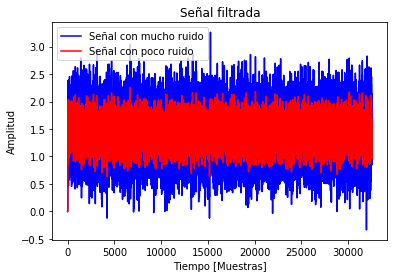

In [201]:
plt.figure()

plt.plot(señal_mucho_ruido_conv,'b')
plt.plot(señal_poco_ruido_conv,'r')

plt.title('Señal filtrada')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.legend(('Señal con mucho ruido', 'Señal con poco ruido'))
plt.show()

Se submuestrean las señales tomando una de cada 20.

In [257]:
media_mucho_ruido = statistics.mean(señal_mucho_ruido_conv)
media_poco_ruido = statistics.mean(señal_poco_ruido_conv)

señal_mucho_ruido_sub = señal_mucho_ruido_conv[20::20] - media_mucho_ruido
señal_poco_ruido_sub = señal_poco_ruido_conv[20::20] - media_poco_ruido

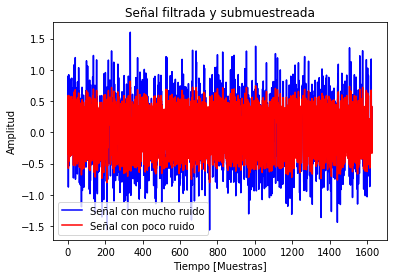

In [258]:
plt.figure()

plt.plot(señal_mucho_ruido_sub,'b')
plt.plot(señal_poco_ruido_sub,'r')

plt.title('Señal filtrada y submuestreada')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.legend(('Señal con mucho ruido', 'Señal con poco ruido'))
plt.show()

Habiendo restado la media se toma como bit 1 a las señales positivas y bit 0 a las negativas

In [259]:
N_sub = len(señal_mucho_ruido_sub)

bits_mucho_ruido = np.zeros(N_sub)
bits_poco_ruido = np.zeros(N_sub)

for i in range(N_sub):
    if señal_mucho_ruido_sub[i] > 0:
        bits_mucho_ruido[i] = 1   
        
    if señal_poco_ruido_sub[i] > 0:
        bits_poco_ruido[i] = 1   

Graficando los resultados se puede visualizar el patrón dato

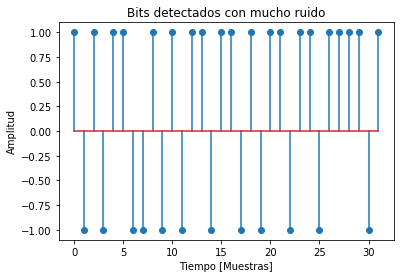

In [260]:
plt.figure()
plt.stem(2*bits_mucho_ruido[:128//4]-1)

plt.title('Bits detectados con mucho ruido')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.show()

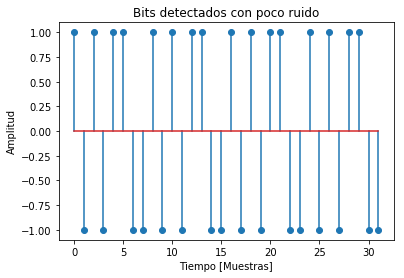

In [262]:
plt.figure()
plt.stem(2*bits_poco_ruido[:128//4]-1)

plt.title('Bits detectados con poco ruido')
plt.xlabel('Tiempo [Muestras]')
plt.ylabel('Amplitud')
plt.show()

In [265]:
print (*bits_mucho_ruido[:128//4],sep="|")

1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|1.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|1.0|1.0|0.0|1.0|1.0|1.0|1.0|0.0|1.0


In [264]:
print (*bits_poco_ruido[:128//4],sep="|")

1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0|1.0|0.0|1.0|0.0|1.0|1.0|0.0|0.0


In [266]:
aux_mucho_ruido = 0
aux_poco_ruido = 0
dim = 8*16
for i in range(dim):
    if(header[i] == bits_mucho_ruido[i]):
        aux_mucho_ruido += 1
    if(header[i] == bits_poco_ruido[i]):
        aux_poco_ruido += 1           
        
print("Coincidencia de bits (mucho ruido):",100*aux_mucho_ruido/dim,"%")      
print("Coincidencia de bits (poco ruido):",100*aux_poco_ruido/dim,"%")  

Coincidencia de bits (mucho ruido): 89.84375 %
Coincidencia de bits (poco ruido): 100.0 %


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Escriba aquí su respuesta.
</div>